<a href="https://colab.research.google.com/github/k2moon/bigbungi/blob/main/bigbungi_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅분기 실기 - 기본

## 절차
0. python, pandas, numpy
1. 데이터 준비 및 기본 확인
2. 데이터 관찰 및 가공
3. 데이턴 분리
4. 데이터 훈련 및 평가
5. 결과 출력 및 저장


# python, pandas, numpy

## python

In [4]:
# round() 반올림
f = 3.1459
round(f, 2)

# len() 길이
s = 'hello'
len(s)

5

## pandas, numpy


In [6]:
# import
import pandas as pd
import numpy as np

# read_csv()
data = 'http://thedata.kr/down/dataset/mtcars.csv'
df = pd.read_csv(data)
df.head(1)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110,3.9,2.62,16.46,0,manual,4,4


In [ ]:
mpg_pd = df.iloc[:, 1]
mpg_np = np.array(mpg_pd)

# mean
print(mpg_pd.mean(), mpg_np.mean())

20.090625000000003 20.090625000000003


In [ ]:

# var - (pandas:표본분산), (numpy:모분산)
print(mpg_pd.var(), mpg_np.var())

# var(ddof) - (pandas:ddof=1), (numpy:ddof=0)
print(mpg_pd.var(ddof=0), mpg_np.var())
print(mpg_pd.var(), mpg_np.var(ddof=1))

36.32410282258064 35.188974609374995
35.188974609374995 35.188974609374995
36.32410282258064 36.32410282258064


In [ ]:
# std - (pandas:표본표준편차), (numpy:모표준편차)
print(mpg_pd.std(), mpg_np.std())

# std(ddof) - (pandas:ddof=1), (numpy:ddof=0)
print(mpg_pd.std(ddof=0), mpg_np.std())
print(mpg_pd.std(), mpg_np.std(ddof=1))

6.026948052089104 5.932029552301218
5.932029552301218 5.932029552301218
6.026948052089104 6.026948052089104


In [ ]:
# size
print(mpg_pd.size)

# count()
print('hello'.count('l'), mpg_pd.count())

32
2 32


In [ ]:
# sort_index(ascending=False)
print(mpg_pd.sort_index().head())

# sort_values(ascending=False)
print(mpg_pd.sort_values().head())

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
15    10.4
14    10.4
23    13.3
6     14.3
16    14.7
Name: mpg, dtype: float64


In [ ]:
# drop(index or col , axis = 0 or 1)
# drop(index=index_name)
# drop(columns=col_name)

## 기본 실습 데이터 - mtcars dataset
- 32종의 자동차의 디자인과 성능 특성, 연료 소모량(연비) 정보등으로 구성
- https://zetawiki.com/wiki/Mtcars_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B

## 데이터 준비 및 기본 확인 Read CSV

In [7]:
import pandas as pd
import numpy as np

data = 'http://thedata.kr/down/dataset/mtcars.csv'
df = pd.read_csv(data)

In [ ]:
# dir
print(dir(df))

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmatmul__', '__rmod__', '__rmul_

In [ ]:
# type
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# info()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         30 non-null     float64
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        31 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     object 
 10  gear        32 non-null     object 
 11  carb        32 non-null     int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 3.1+ KB
None


In [ ]:
# head(), tail()
print(df.head())
print(df.tail())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs      am  \
0          Mazda RX4  21.0  6.0  160.0  110  3.90  2.620  16.46   0  manual   
1      Mazda RX4 Wag  21.0  6.0  160.0  110  3.90  2.875  17.02   0  manual   
2         Datsun 710  22.8  4.0  108.0   93  3.85  2.320  18.61   1  manual   
3     Hornet 4 Drive  21.4  6.0  258.0  110  3.08  3.215   0.10   1    auto   
4  Hornet Sportabout  18.7  8.0  360.0  175  3.15  3.440  17.02   0    auto   

  gear  carb  
0    4     4  
1    4     4  
2    4     1  
3    3     1  
4    3     2  
        Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs      am gear  \
27    Lotus Europa  30.4  4.0   95.1  113  3.77  1.513  16.9   1  manual    5   
28  Ford Pantera L  15.8  8.0  351.0  264  4.22  3.170  14.5   0  manual   *5   
29    Ferrari Dino  19.7  6.0  145.0  175  3.62  2.770  15.5   0  manual    5   
30   Maserati Bora  15.0  8.0  301.0  335  3.54  3.570  14.6   0  manual    5   
31      Volvo 142E  21.4  4.0 

In [ ]:
# shape
print(df.shape)

(32, 12)


In [ ]:
# size
print(df.size)

384


In [ ]:
# count()
print(df.count())

Unnamed: 0    32
mpg           32
cyl           30
disp          32
hp            32
drat          32
wt            32
qsec          31
vs            32
am            32
gear          32
carb          32
dtype: int64


In [ ]:
# index
print(df.index)

RangeIndex(start=0, stop=32, step=1)


In [ ]:
# columns
print(df.columns)

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


In [ ]:
# describe() - 숫자만
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  30.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   7.600000  230.721875  146.687500   3.596563   3.217250   
std     6.026948   8.194195  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000  50.000000  472.000000  335.000000   4.930000   5.424000   

             qsec         vs     carb  
count   31.000000  32.000000  32.0000  
mean    19.866774   0.437500   2.8125  
std     15.310469   0.504016   1.6152  
min      0.100000   0.000000   1.0000  
25%     16.785000   0.000000   2.0000  
50%     17.600000   0.000000   2.0000  
75%     18.755000   1.0000

In [ ]:
# help()
#print(help(df.describe))

In [ ]:
# unique()
print(df['gear'].unique())

['4' '3' '*3' '5' '*5']


In [ ]:
# corr  (-1 ~ 1 , heatmap)
print(df.corr())

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.460227 -0.847551 -0.776168  0.681172 -0.867659  0.013668   
cyl  -0.460227  1.000000  0.544876  0.323293 -0.372671  0.533690 -0.012755   
disp -0.847551  0.544876  1.000000  0.790949 -0.710214  0.887980  0.181810   
hp   -0.776168  0.323293  0.790949  1.000000 -0.448759  0.658748  0.010807   
drat  0.681172 -0.372671 -0.710214 -0.448759  1.000000 -0.712441 -0.120283   
wt   -0.867659  0.533690  0.887980  0.658748 -0.712441  1.000000  0.093900   
qsec  0.013668 -0.012755  0.181810  0.010807 -0.120283  0.093900  1.000000   
vs    0.664039 -0.323960 -0.710416 -0.723097  0.440278 -0.554916 -0.112146   
carb -0.550925  0.239980  0.394977  0.749812 -0.090790  0.427606 -0.120312   

            vs      carb  
mpg   0.664039 -0.550925  
cyl  -0.323960  0.239980  
disp -0.710416  0.394977  
hp   -0.723097  0.749812  
drat  0.440278 -0.090790  
wt   -0.554916  0.427606  
qsec -0.112146 -0.120312  
vs 

<ipython-input-20-06f7ace32fa3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
# corr()
df[['mpg','hp']].corr()

,mpg,hp
mpg,1.000000,-0.776168
hp,-0.776168,1.000000


## 데이터 관찰 및 가공 Preprocessing(전처리)

### 전처리 절차
1. 불필요한 열 삭제
2. 결측치 처리
3. 이상치 처리 - object
4. 이상치 처리 - number
5. 정규화 작업
6. 인코딩 작업
7. 파생변수 생성



In [8]:
df_copy = df.copy()

In [9]:
#불필요한 열 삭제
#df = df.drop('Unnamed: 0', axis=1)
df = df.drop(columns='Unnamed: 0')
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6.0,160.0,110,3.90,2.620,16.46,0,manual,4,4
1,21.0,6.0,160.0,110,3.90,2.875,17.02,0,manual,4,4
2,22.8,4.0,108.0,93,3.85,2.320,18.61,1,manual,4,1
3,21.4,6.0,258.0,110,3.08,3.215,0.10,1,auto,3,1
4,18.7,8.0,360.0,175,3.15,3.440,17.02,0,auto,3,2


In [10]:
#결측치 처리
print(df.isnull().sum()) # 확인

mpg     0
cyl     2
disp    0
hp      0
drat    0
wt      0
qsec    1
vs      0
am      0
gear    0
carb    0
dtype: int64


In [11]:
## cyl mean 처리 fillna(value)
cyl_mean = df['cyl'].mean()
df['cyl'] = df['cyl'].fillna(cyl_mean)
#df.head()
## qsec median 처리
qsec_median = df['qsec'].median()
df['qsec'] = df['qsec'].fillna(qsec_median)

## 확인
print(df.isnull().sum())

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


In [ ]:
#잘못된 값 처리 - object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     float64
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     object 
 9   gear    32 non-null     object 
 10  carb    32 non-null     int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 2.9+ KB


In [12]:
#이상치 처리 - object
#df['hp'].unique()
df['am'].unique()
df['gear'].unique() # *3, *5 처리 필요 => 3, 5
#df['gear'].replace('*3','3').replace('*4','4').head()
# or
df['gear'] = df['gear'].str.replace('*','', regex=True)
df['gear'].unique()

array(['4', '3', '5'], dtype=object)

<Axes: >

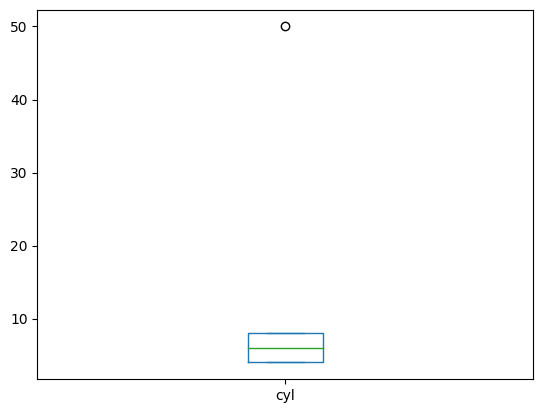

In [ ]:
df = df_copy
df['cyl'].plot(kind='box') # 시험장에서는 그림 출력 불가함

In [13]:
#이상치 처리 - number
# IQR : 1.5 * IQR
# cyl 처리
# describe() 사용
col = 'cyl'
df_desc = df.describe()
q1 = df_desc[col].loc['25%']
q3 = df_desc[col].loc['75%']
df_iqr =  q3 - q1 
print(q1, q3, df_iqr) # 4.0 8.0 4.0
iqr_min = q1 - df_iqr * 1.5
iqr_max = q3 + df_iqr * 1.5
print(iqr_max, iqr_min) # 14.0 -2.0
cond_min = df[col] < iqr_min
cond_max = df[col] >iqr_max
df.loc[cond_min] # x
df.loc[cond_max] # 14 row
df.loc[14,col] = iqr_max
print(df.loc[14, col])

4.0 8.0 4.0
14.0 -2.0
14.0


<Axes: >

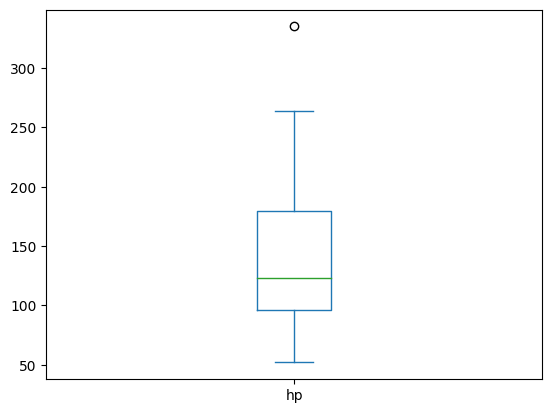

In [ ]:
df['hp'].plot(kind='box') # 시험장에서는 그림 출력 불가함

In [14]:
# IQR : 1.5 * IQR
# hp 처리
# quantile() 사용
col = 'hp'
q1 = df[col].quantile(.25)
q3 = df[col].quantile(.75)
iqr = q3 - q1 # 205.175
print(q1, q3, iqr) # 96.5 180.0 83.5
iqr_min = q1 - iqr * 1.5
iqr_max = q3 + iqr * 1.5
print(iqr_min, iqr_max) #-28.75 305.25
cond_min = df[col] < iqr_min
cond_max = df[col] >iqr_max
print(df.loc[cond_min]) # x
print(df.loc[cond_max]) # 30 row
df.loc[30,col] = iqr_max
print(df.loc[30, col]) # 305.25

96.5 180.0 83.5
-28.75 305.25
Empty DataFrame
Columns: [mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb]
Index: []
     mpg  cyl   disp   hp  drat    wt  qsec  vs      am gear  carb
30  15.0  8.0  301.0  335  3.54  3.57  14.6   0  manual    5     8
305.25


In [ ]:
#정규화 작업 Data scaling
# Standard scaling 평균=0, 편차=1
from sklearn.preprocessing import StandardScaler

temp = df[['qsec']] # sklearn 2차원 data 필요
scaler = StandardScaler()
rs = scaler.fit_transform(temp) # numpy.ndarray
print(rs[0:5])

[[-0.22619087]
 [-0.18900998]
 [-0.08344282]
 [-1.31240394]
 [-0.18900998]]


In [ ]:
#정규화 작업 Data scaling
# Min-Max scaling min=0,max=1
from sklearn.preprocessing import MinMaxScaler

temp = df[['qsec']] # sklearn 2차원 data 필요
scaler = MinMaxScaler()
rs = scaler.fit_transform(temp) # numpy.ndarray
print(rs[0:5])

[[0.16376376]
 [0.16936937]
 [0.18528529]
 [0.        ]
 [0.16936937]]


In [ ]:
#정규화 작업 Data scaling
# Robust scaling median=0,iqr=1
from sklearn.preprocessing import RobustScaler

temp = df[['qsec']] # sklearn 2차원 data 필요
scaler = RobustScaler()
rs = scaler.fit_transform(temp) # numpy.ndarray
print(rs[0:5])

[[-0.5786802 ]
 [-0.29441624]
 [ 0.51269036]
 [-8.88324873]
 [-0.29441624]]


In [19]:
# 타입 변경하기 astype()
#df['gear'] = df['gear'].str.replace('*','')
df['gear'] = df['gear'].astype('int32') 
df['gear'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32 entries, 0 to 31
Series name: gear
Non-Null Count  Dtype
--------------  -----
32 non-null     int32
dtypes: int32(1)
memory usage: 256.0 bytes


In [83]:
# 인코딩 작업 encoding 범주형 -> 숫자
# 원핫 인코딩 : One-Hot Encoding pd.get_dummies()
# 범주형 변수에 고유한 순서가 없고 모든 범주가 ​​동일하게 구별되는 경우 또는 범주형 변수가 독립적이라고 가정하는 알고리즘
# 고유한 범주의 수가 많은 경우 원-핫 인코딩으로 인해 고차원 데이터가 생성되어 희소성 및 계산 문제가 발생
# 로지스틱회귀, 신경망, k-NN
print(df['am'].unique()) 
pd.get_dummies(df) # 범주형만 수행, sklearn OneHotEncoder() 범주형, 연속형 모두 수행
pd.get_dummies(df['am'], drop_first=True).head() # drop_first=True 0, 1 중 한개로 처리
pd.get_dummies(df['am']).head() # 0 1 로 2개로 처리 

['manual' 'auto']


,auto,manual
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [78]:
# 인코딩 작업 encoding 범주형 -> 숫자
# 원핫 인코딩 : One-Hot Encoding OneHotEncoder()
from sklearn.preprocessing import OneHotEncoder
temp = df[['am']]
#print(temp)
encoder = OneHotEncoder()
encoder.fit(temp)
rs = encoder.transform(temp).toarray() # ndarray
cols = encoder.get_feature_names_out() # 추가할 컬럼명
df_am = pd.DataFrame(rs,columns=cols)
df_am.head()

,am_auto,am_manual
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
# sparse_output=True 희소 행렬
# 행렬의 값이 대부분 '0'인 행렬을 희소행렬(Sparse matrix) 
# 행렬의 값이 대부분 '0이 아닌 값'을 가지는 경우 밀집행렬(Dense matrix) 
# https://rfriend.tistory.com/551
from sklearn.preprocessing import OneHotEncoder
temp = df[['am']]
#print(temp)
encoder = OneHotEncoder(sparse_output=True)
rs = encoder.fit_transform(temp)
print(rs.data)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# 인코딩 작업 encoding 범주형 -> 숫자
# 라벨 인코딩 : Label Encoding 
# 범주형 변수에 고유한 순서 또는 계층 구조가 있고 해당 정보가 문제와 관련된 경우
# 결정트리, 랜덤포레스트, 그래디언트부스팅
from sklearn.preprocessing import LabelEncoder
temp = df['am']
encoder = LabelEncoder()
rs = encoder.fit_transform(temp)
print(rs)


[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1]


In [15]:
# 수동 Replace
df['am_new'] = df['am'].replace('manual', 0).replace('auto',1)

In [16]:
#파생변수 생성
# wt열 3.3이상이면 1, 미만 0
df['wt'].head()
cond = df['wt'] < 3.3
df.loc[cond, 'wt'].head()
df.loc[cond,'wt_class'] = 0
df.loc[~cond,'wt_class'] = 1
df['wt_class'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: wt_class, dtype: float64

In [17]:
#파생변수 생성
# qsec열 1/4 mile -> 1mile 단위로
df['qsec_4'] = df['qsec'] * 4
print(df['qsec'].head(3))
print(df['qsec_4'].head(3))

0    16.46
1    17.02
2    18.61
Name: qsec, dtype: float64
0    65.84
1    68.08
2    74.44
Name: qsec_4, dtype: float64


## 데이터 분리
- 학습 데이트
- 테스트 데이
- x_train, x_test, y_train, y_test

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       32 non-null     float64
 1   cyl       32 non-null     float64
 2   disp      32 non-null     float64
 3   hp        32 non-null     float64
 4   drat      32 non-null     float64
 5   wt        32 non-null     float64
 6   qsec      32 non-null     float64
 7   vs        32 non-null     int64  
 8   am        32 non-null     object 
 9   gear      32 non-null     int32  
 10  carb      32 non-null     int64  
 11  am_new    32 non-null     int64  
 12  wt_class  32 non-null     float64
 13  qsec_4    32 non-null     float64
dtypes: float64(9), int32(1), int64(3), object(1)
memory usage: 3.5+ KB


In [21]:
from sklearn.model_selection import train_test_split

# 레이블 선택
Y = df.loc[:,'mpg']
# 데이터 선택
X = df.loc[:,'cyl':'qsec_4']
# 불필요 데이터 제거
X = X.drop(columns=['wt', 'qsec','am'])
X.head()

,cyl,disp,hp,drat,vs,gear,carb,am_new,wt_class,qsec_4
0,6.0,160.0,110.0,3.90,0,4,4,0,0.0,65.84
1,6.0,160.0,110.0,3.90,0,4,4,0,0.0,68.08
2,4.0,108.0,93.0,3.85,1,4,1,0,0.0,74.44
3,6.0,258.0,110.0,3.08,1,3,1,1,0.0,0.40
4,8.0,360.0,175.0,3.15,0,3,2,1,1.0,68.08


In [ ]:
# train_test_split()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(x_train.head(3))
print(y_train.head(3))

    cyl   disp     hp  drat  vs  am  gear  carb  wt_class  qsec_4
4   8.0  360.0  175.0  3.15   0   0     3     2       1.0   68.08
16  8.0  440.0  230.0  3.23   0   0     3     4       1.0   69.68
5   6.0  225.0  105.0  2.76   1   0     3     1       1.0   80.88
4     18.7
16    14.7
5     18.1
Name: mpg, dtype: float64


## 데이터 훈련 및 평가

### 모델링 modeling
- 종속 변수에 따라 예측(회귀) or 분류 모델
- 연속형 종속 변수 : 예측(회귀)
- 범주형 종속 변수 : 분류

### 평가
- 예측, 또는 분류한 값이 믿을 수 있는 가 확인 하는 작업
- 회귀 : MAE, MSE, RMSE, 결정계수 R^2
- 분류 : ROC-AUC, 정확도, 정밀도, 재현율

### 예측(회귀) 모델링
- LinearRegression
- RandomForestRegressor
- XGBRegressor
- 평가 : MAE, MSE, RMSE, 결정계수 R^2

In [ ]:
# mpg 연속형 변수 : 예측(회귀)
from sklearn.linear_model import LinearRegression

# model
model = LinearRegression()

# training
model.fit(x_train, y_train)

# prediction
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [ ]:
# 절편, 회귀 계수 값 확인
dir(model)
# 절편
print(model.intercept_)
# 회귀 계수
print(model.coef_)

17.234618087115336 [-3.30176941e-01 -4.95463133e-04 -3.27970822e-02  2.23619046e+00
  4.12190478e-01  1.86461373e+00  1.18870352e+00 -1.10863938e+00
  3.07616913e-01 -1.25185835e-02]


In [ ]:
# 평가 결정계수
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8401133678838211
0.7210108966598392


In [ ]:
# 평가 모듈 metric
# 결정 계수는 1, Error들은 0에 가까울 수록 좋은 성능
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

print(r2_score(y_train, pred_train), r2_score(y_test, pred_test))
print(mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test))
print(mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test))
print(np.sqrt(mean_squared_error(y_train, pred_train)), np.sqrt(mean_squared_error(y_test, pred_test)))


0.8401133678838211 0.7210108966598392
1.896913460353686 2.3882706542281538
5.7014912324066955 9.481751565029036
2.3877795610999555 3.079245291468193


In [ ]:
# 랜덤 포레스트 회귀 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(r2_score(y_train, pred_train), r2_score(y_test, pred_test))
print(mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test))
print(mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test))
print(np.sqrt(mean_squared_error(y_train, pred_train)), np.sqrt(mean_squared_error(y_test, pred_test)))

0.9633461642575233 0.925147904584521
0.8605454545454431 1.2280000000000015
1.307060636363603 2.5439308000000085
1.143267526156325 1.5949704699460767


In [ ]:
# 랜덤 포레스트 회귀 RandomForestRegressor
# 문제에서 평가 지표 MAE => criterion, 트리 갯수 1000개(기본 100개) => n_estimators
# 현재 시험(6회) criterion='mae'
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=1000,criterion='absolute_error', random_state=42)
model.fit(x_train, y_train)

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(r2_score(y_train, pred_train), r2_score(y_test, pred_test))
print(mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test))
print(mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test))
print(np.sqrt(mean_squared_error(y_train, pred_train)), np.sqrt(mean_squared_error(y_test, pred_test)))

0.9643897277701767 0.9182712619350253
0.8655090909089861 1.3023850000000268
1.2698475927269741 2.7776410647500382
1.1268751451367511 1.6666256522536902


In [58]:
# 랜덤 포레스트 회귀 XGBRegressor
# 문제에서 평가 지표 MAE => criterion, 트리 갯수 1000개(기본 100개) => n_estimators
# 다수의 약한 분류기를 묶어 병렬 처리
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

model = XGBRegressor(random_state=42)
model.fit(x_train, y_train)

pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(r2_score(y_train, pred_train), r2_score(y_test, pred_test))
print(mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test))
print(mean_squared_error(y_train, pred_train), mean_squared_error(y_test, pred_test))
print(np.sqrt(mean_squared_error(y_train, pred_train)), np.sqrt(mean_squared_error(y_test, pred_test)))

0.9999977142547066 -0.19824356440512103
0.00046884423301724547 0.30027799938688987
5.289327951733786e-07 0.29956089110128026
0.0007272776603013313 0.5473215609687602


### 분류 모델링
- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression
- 평가 : ROC-AUC(roc_auc_score), 정확도(accuracy_score), 정밀도(precision_socre), 재현율(recall_score) 
- 평가 : 모두 1에 가까워야 좋은 성능

In [29]:
from sklearn.model_selection import train_test_split

# 레이블 선택
Y = df.loc[:,'am_new']
# 데이터 선택
X = df.loc[:,'cyl':'qsec_4']
# 불필요 데이터 제거
X = X.drop(columns=['wt', 'qsec','am_new'])
X.head()


,cyl,disp,hp,drat,vs,gear,carb,wt_class,qsec_4
0,6.0,160.0,110.0,3.90,0,4,4,0.0,65.84
1,6.0,160.0,110.0,3.90,0,4,4,0.0,68.08
2,4.0,108.0,93.0,3.85,1,4,1,0.0,74.44
3,6.0,258.0,110.0,3.08,1,3,1,0.0,0.40
4,8.0,360.0,175.0,3.15,0,3,2,1.0,68.08


In [30]:
# train_test_split()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(x_train.head(3))
print(y_train.head(3))

    cyl   disp     hp  drat  vs  gear  carb  wt_class  qsec_4
4   8.0  360.0  175.0  3.15   0     3     2       1.0   68.08
16  8.0  440.0  230.0  3.23   0     3     4       1.0   69.68
5   6.0  225.0  105.0  2.76   1     3     1       1.0   80.88
4     1
16    1
5     1
Name: am_new, dtype: int64


In [43]:
# 훈련 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

pred_test = model.predict(x_test)

In [44]:
# 평가 - 문제에서 주어 지는 평가 사용
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print(roc_auc_score(y_test, pred_test))
print(accuracy_score(y_test, pred_test))
print(precision_score(y_test, pred_test))
print(recall_score(y_test, pred_test))

0.7000000000000001
0.7
0.6666666666666666
0.8


In [41]:
# 훈련 RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

pred_test = model.predict(x_test)

In [46]:
# 평가 - 문제에서 주어 지는 평가 사용
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print(roc_auc_score(y_test, pred_test))
print(accuracy_score(y_test, pred_test))
print(precision_score(y_test, pred_test))
print(recall_score(y_test, pred_test))

0.7000000000000001
0.7
0.6666666666666666
0.8


In [65]:
# 훈련 LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500,random_state=42) # ConvergenceWarnin 시 max_iter 값 늘려주기
model.fit(x_train, y_train)

pred_test = model.predict(x_test)

In [64]:
# 평가 - 문제에서 주어 지는 평가 사용
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print(roc_auc_score(y_test, pred_test))
print(accuracy_score(y_test, pred_test))
print(precision_score(y_test, pred_test))
print(recall_score(y_test, pred_test))

0.9
0.9
1.0
0.8


In [86]:
# 훈련 XGBClassifier
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42) 
model.fit(x_train, y_train)

pred_test = model.predict(x_test)
proba_test = model.predict_proba(x_test) # 분류 확률 값 (0확률, 1확률)

In [88]:
print(proba_test[:5])

[[0.22745252 0.7725475 ]
 [0.03111327 0.96888673]
 [0.03111327 0.96888673]
 [0.8808216  0.11917841]
 [0.8586019  0.14139809]]


In [61]:
# 평가 - 문제에서 주어 지는 평가 사용
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print(roc_auc_score(y_test, pred_test))
print(accuracy_score(y_test, pred_test))
print(precision_score(y_test, pred_test))
print(recall_score(y_test, pred_test))

0.7000000000000001
0.7
0.6666666666666666
0.8


##결과 출력 및 저장
- 결과 출력 : print()
- 결과 파일 저장 : pd.DataFrame(pred_test).to_csv('data/수험번호.csv', index=False)